In [ ]:
import pandas as pd
# Change the filename as needed
df = pd.read_csv('/content/drive/MyDrive/CSE477/cleaned_comments.csv') # or
pd.read_table('/content/drive/MyDrive/CSE477/comments_clean.txt')
print(f"My dataset contains {df.shape[0]} comments and {df.shape[1]} columns.")

My dataset contains 200 comments and 4 columns.


With 200 comments, the clustering may identify some coherent topics, but the small dataset size limits diversity and robustness, so results might be less stable and more sensitive to noise. While 40 comments is enough to run the code, it’s unlikely to produce meaningful or generalizable topics because there’s too little text data to form distinct, well-defined clusters.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# If your file uses 'cleaned_tokens', join tokens to a string
if 'cleaned_tokens' in df.columns:
 corpus = df['cleaned_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x)).tolist()
elif 'cleaned_text' in df.columns:
 corpus = df['cleaned_text'].astype(str).tolist()
else:
 raise Exception("No usable text column found. Please check your Lab 2 output.")
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(corpus)

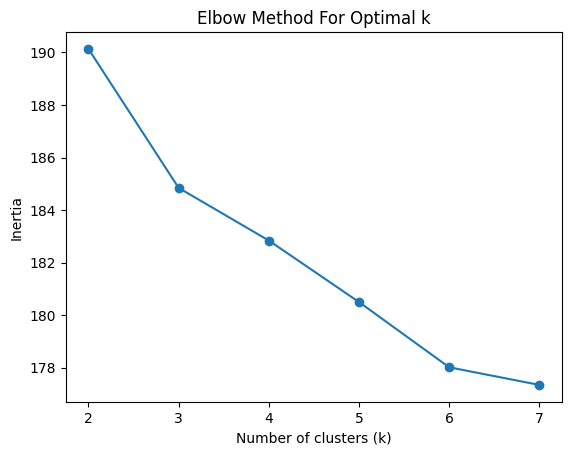

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
K = range(2, 8)
for k in K:
 kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
 kmeans.fit(X)
 inertia.append(kmeans.inertia_)
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
optimal_k = 10 # set this based on your Elbow Plot analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['kmeans_label'] = kmeans.fit_predict(X)
import numpy as np
terms = vectorizer.get_feature_names_out()
for i in range(optimal_k):
 cluster_center = kmeans.cluster_centers_[i]
 top_indices = cluster_center.argsort()[-10:][::-1]
 top_terms = [terms[idx] for idx in top_indices]
 print(f"Cluster {i}: {', '.join(top_terms)}")

Cluster 0: video, best, learning, machine, youtube, watched, lot, great, brilliant, one
Cluster 1: asleep, fell, woke, watching, playing, youtube, video, dashie, sooooo, reply
Cluster 2: regression, implementation, using, linear, model, data, tensorflow, training, neural, bayes
Cluster 3: tutorial, excellent, nice, time, much, python, thank, first, found, awesome
Cluster 4: sharing, wow, beautiful, immense, thank, without, helpful, thanks, effort, make
Cluster 5: thanks, pakistan, excellent, creating, sharing, content, amazing, kylie, course, fleshed
Cluster 6: kylie, thank, ying, really, professor, much, like, life, morocco, course
Cluster 7: reply, woke, day, code, falling, lol, list, error, else, asleep
Cluster 8: explained, nothing, perfectly, honest, yikes, thank, much, everything, lesson, dog
Cluster 9: course, good, understand, beginner, thank, learning, dont, great, know, watch


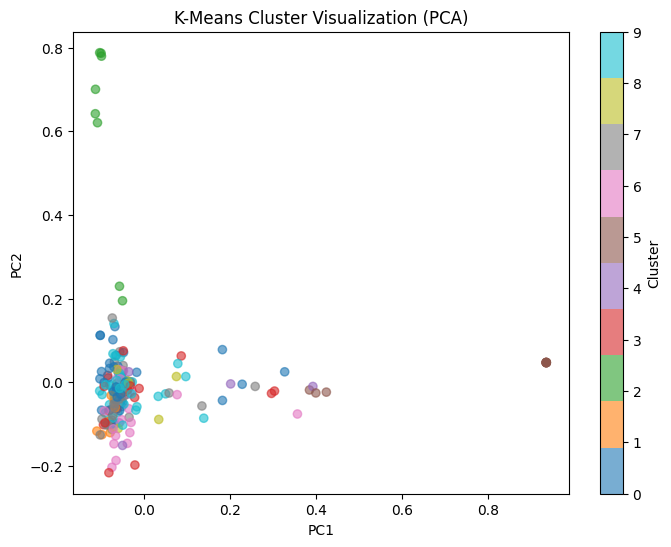

In [ ]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X.toarray())
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['kmeans_label'], cmap='tab10', alpha=0.6)
plt.title('K-Means Cluster Visualization (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_scaled = StandardScaler(with_mean=False).fit_transform(X)

In [ ]:
from sklearn.cluster import DBSCAN
results = []
for eps in [0.3, 0.5, 0.7]:
 dbscan = DBSCAN(eps=eps, min_samples=5)
 labels = dbscan.fit_predict(X_scaled)
 n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
 n_noise = list(labels).count(-1)
 results.append({'eps': eps, 'min_samples': 5, 'clusters': n_clusters, 'noise_points': n_noise})
 print(f"eps={eps}: clusters={n_clusters}, noise_points={n_noise}")

import pandas as pd
print(pd.DataFrame(results))

eps=0.3: clusters=1, noise_points=194
eps=0.5: clusters=1, noise_points=194
eps=0.7: clusters=1, noise_points=194
   eps  min_samples  clusters  noise_points
0  0.3            5         1           194
1  0.5            5         1           194
2  0.7            5         1           194


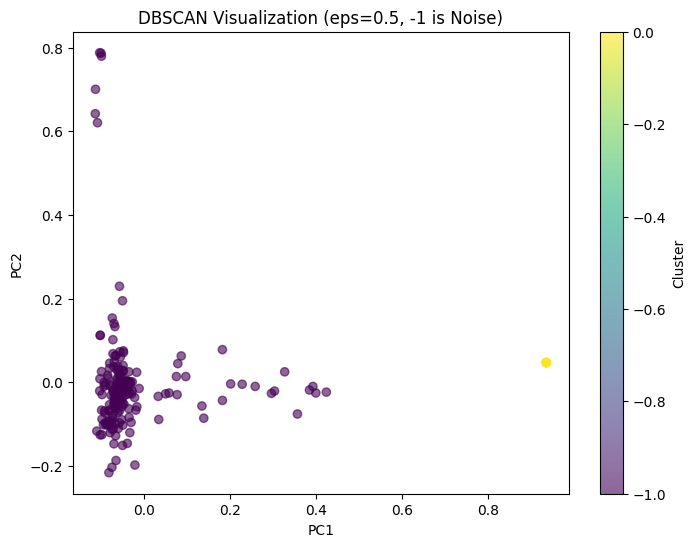

In [ ]:
best_eps = 0.5 # <-- Set this to your chosen eps value
dbscan_final = DBSCAN(eps=best_eps, min_samples=5)
final_labels = dbscan_final.fit_predict(X_scaled)
# Use the same X_pca as in the K-Means section (do not recompute)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=final_labels, cmap='viridis',
alpha=0.6)
plt.title(f'DBSCAN Visualization (eps={best_eps}, -1 is Noise)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()